In [1]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# Load an example image
image = Image.open("/content/Snapchat-1071439276.jpg") 

# Define common transformations
transformations = transforms.Compose([
    transforms.Resize((128, 128)),               # Resize to 128x128
    transforms.RandomHorizontalFlip(p=0.5),     # Flip horizontally with 50% probability
    transforms.RandomRotation(30),             # Rotate image randomly by ±30 degrees
    transforms.ToTensor(),                      # Convert image to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], # Normalize RGB channels
                         std=[0.5, 0.5, 0.5])
])

In [4]:
# Apply transformations
transformed_image = transformations(image)


# New Section

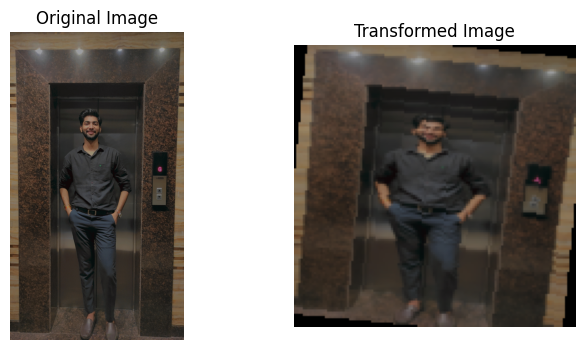

In [5]:
# Visualize Original and Transformed Image
def show_image(tensor_image, title):
    img = tensor_image.numpy().transpose(1, 2, 0)  # Convert tensor to image format
    img = (img * 0.5) + 0.5  # Denormalize
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
show_image(transformed_image, "Transformed Image")
plt.show()

# New Section

In [6]:
import torch.nn as nn
import torch.optim as optim

In [7]:
# Define a simple model
model = nn.Linear(10, 1)  # A single-layer network

In [8]:
# Define a loss function
criterion = nn.MSELoss()

# Configure optimizers
optimizer_sgd = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent
optimizer_adam = optim.Adam(model.parameters(), lr=0.01)  # Adam Optimizer


In [9]:
# Example of using an optimizer
x = torch.randn(5, 10)  # Dummy input
y = torch.randn(5, 1)   # Dummy target

# Forward pass
output = model(x)
loss = criterion(output, y)

# Backward pass
optimizer_sgd.zero_grad()  # Clear gradients
loss.backward()            # Backpropagation
optimizer_sgd.step()       # Update weights

print(f"Loss after SGD optimization: {loss.item()}")

Loss after SGD optimization: 1.02052903175354


Building a Simple CNN in Pytorch

In [ ]:
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)  # Convolutional Layer
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Max Pooling Layer
        self.fc1 = nn.Linear(32 * 8 * 8, 128)  # Fully Connected Layer
        self.fc2 = nn.Linear(128, 10)         # Output Layer (10 classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv1 -> ReLU -> Pooling
        x = self.pool(F.relu(self.conv2(x)))  # Conv2 -> ReLU -> Pooling
        x = x.view(-1, 32 * 8 * 8)            # Flatten
        x = F.relu(self.fc1(x))               # Fully Connected Layer
        x = self.fc2(x)                       # Output Layer
        return x
        

# Instantiate the model
model = SimpleCNN()
print(model)


SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)
